In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import os
import matplotlib.dates as mdates
import numpy as np

## Dataset

In [2]:
BASE_DIR_PATH = '../Datasets'
DATASET_FILE = os.path.join(BASE_DIR_PATH, '2016_2017_sto_nino_and_montalban.csv')

In [3]:
df = pd.read_csv(DATASET_FILE)
df

,Unnamed: 0,datetime,month,day,hour,t,Station,x,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel,Discharge,Cross_Section,Velocity,fric_coeff,slope
0,0,2016-01-01 00:00:00,1,1,0,0.0,Montalban,0,0,1,2,0,0,21.03,14.842428,630.90,0.023526,0.035,0.002000
1,1,2016-01-01 00:00:00,1,1,0,0.0,Sto_Nino,14420,0,1,2,0,0,12.18,21.033407,803.88,0.026165,0.033,0.000667
2,2,2016-01-01 01:00:00,1,1,1,3600.0,Montalban,0,0,1,1,1,0,21.03,14.842428,630.90,0.023526,0.035,0.002000
3,3,2016-01-01 01:00:00,1,1,1,3600.0,Sto_Nino,14420,0,1,1,1,0,12.19,21.280072,804.54,0.026450,0.033,0.000667
4,4,2016-01-01 02:00:00,1,1,2,7200.0,Montalban,0,1,1,1,0,1,21.03,14.842428,630.90,0.023526,0.035,0.002000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,35035,2017-12-31 21:00:00,12,31,21,63147600.0,Sto_Nino,14420,0,0,0,0,0,12.44,28.244204,821.04,0.034401,0.033,0.000667
35036,35036,2017-12-31 22:00:00,12,31,22,63151200.0,Montalban,0,0,0,0,0,0,21.18,17.224575,635.40,0.027108,0.035,0.002000
35037,35037,2017-12-31 22:00:00,12,31,22,63151200.0,Sto_Nino,14420,0,0,0,0,0,12.44,28.244204,821.04,0.034401,0.033,0.000667
35038,35038,2017-12-31 23:00:00,12,31,23,63154800.0,Montalban,0,0,0,0,0,0,21.18,17.224575,635.40,0.027108,0.035,0.002000


In [4]:
df = df[['datetime', 'Station', 'Waterlevel']]
df

,datetime,Station,Waterlevel
0,2016-01-01 00:00:00,Montalban,21.03
1,2016-01-01 00:00:00,Sto_Nino,12.18
2,2016-01-01 01:00:00,Montalban,21.03
3,2016-01-01 01:00:00,Sto_Nino,12.19
4,2016-01-01 02:00:00,Montalban,21.03
...,...,...,...
35035,2017-12-31 21:00:00,Sto_Nino,12.44
35036,2017-12-31 22:00:00,Montalban,21.18
35037,2017-12-31 22:00:00,Sto_Nino,12.44
35038,2017-12-31 23:00:00,Montalban,21.18


In [5]:
test_df = df[int(0.75*len(df)):]
test_df

,datetime,Station,Waterlevel
26280,2017-07-02 12:00:00,Montalban,21.26
26281,2017-07-02 12:00:00,Sto_Nino,11.89
26282,2017-07-02 13:00:00,Montalban,21.26
26283,2017-07-02 13:00:00,Sto_Nino,11.87
26284,2017-07-02 14:00:00,Montalban,21.25
...,...,...,...
35035,2017-12-31 21:00:00,Sto_Nino,12.44
35036,2017-12-31 22:00:00,Montalban,21.18
35037,2017-12-31 22:00:00,Sto_Nino,12.44
35038,2017-12-31 23:00:00,Montalban,21.18


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 26280 to 35039
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    8760 non-null   object 
 1   Station     8760 non-null   object 
 2   Waterlevel  8760 non-null   float64
dtypes: float64(1), object(2)
memory usage: 205.4+ KB


In [7]:
test_df['datetime'] = pd.to_datetime(test_df['datetime'])
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 26280 to 35039
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    8760 non-null   datetime64[ns]
 1   Station     8760 non-null   object        
 2   Waterlevel  8760 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 205.4+ KB


C:\Users\neilb\AppData\Local\Temp\ipykernel_27624\2555707009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['datetime'] = pd.to_datetime(test_df['datetime'])


In [8]:
sto_nino_df = test_df[test_df['Station'] == 'Sto_Nino']
sto_nino_df = sto_nino_df.reset_index(drop=True)
sto_nino_df

,datetime,Station,Waterlevel
0,2017-07-02 12:00:00,Sto_Nino,11.89
1,2017-07-02 13:00:00,Sto_Nino,11.87
2,2017-07-02 14:00:00,Sto_Nino,11.85
3,2017-07-02 15:00:00,Sto_Nino,11.84
4,2017-07-02 16:00:00,Sto_Nino,11.84
...,...,...,...
4375,2017-12-31 19:00:00,Sto_Nino,12.44
4376,2017-12-31 20:00:00,Sto_Nino,12.44
4377,2017-12-31 21:00:00,Sto_Nino,12.44
4378,2017-12-31 22:00:00,Sto_Nino,12.44


In [9]:
montalban_df = test_df[test_df['Station'] == 'Montalban']
montalban_df = montalban_df.reset_index(drop=True)
montalban_df

,datetime,Station,Waterlevel
0,2017-07-02 12:00:00,Montalban,21.26
1,2017-07-02 13:00:00,Montalban,21.26
2,2017-07-02 14:00:00,Montalban,21.25
3,2017-07-02 15:00:00,Montalban,21.24
4,2017-07-02 16:00:00,Montalban,21.00
...,...,...,...
4375,2017-12-31 19:00:00,Montalban,21.18
4376,2017-12-31 20:00:00,Montalban,21.18
4377,2017-12-31 21:00:00,Montalban,21.18
4378,2017-12-31 22:00:00,Montalban,21.18


In [10]:
test_dates = sto_nino_df['datetime']
test_dates

0      2017-07-02 12:00:00
1      2017-07-02 13:00:00
2      2017-07-02 14:00:00
3      2017-07-02 15:00:00
4      2017-07-02 16:00:00
               ...        
4375   2017-12-31 19:00:00
4376   2017-12-31 20:00:00
4377   2017-12-31 21:00:00
4378   2017-12-31 22:00:00
4379   2017-12-31 23:00:00
Name: datetime, Length: 4380, dtype: datetime64[ns]

In [11]:
sto_nino_true = sto_nino_df['Waterlevel']
montalban_true = montalban_df['Waterlevel']

## Predictions

### Basic Time Series

In [20]:
add_dates = pd.Series([test_dates.iloc[-1] + dt.timedelta(hours=i) for i in range(1, 25)])
bts_test_dates = pd.concat([test_dates, add_dates], ignore_index=True)
bts_test_dates

0      2017-07-02 12:00:00
1      2017-07-02 13:00:00
2      2017-07-02 14:00:00
3      2017-07-02 15:00:00
4      2017-07-02 16:00:00
               ...        
4399   2018-01-01 19:00:00
4400   2018-01-01 20:00:00
4401   2018-01-01 21:00:00
4402   2018-01-01 22:00:00
4403   2018-01-01 23:00:00
Length: 4404, dtype: datetime64[ns]

In [18]:
add_true = pd.concat([pd.Series([12.44 for i in range(16)]), pd.Series([12.43 for i in range(8)])], ignore_index=True)
bts_true = pd.concat([sto_nino_true, add_true], ignore_index=True)
bts_true

0       11.89
1       11.87
2       11.85
3       11.84
4       11.84
        ...  
4399    12.43
4400    12.43
4401    12.43
4402    12.43
4403    12.43
Length: 4404, dtype: float64

In [19]:
add_pred = pd.Series([
    12.4283, 
    12.4173, 
    12.4067, 
    12.3967,
    12.3873,
    12.3783,
    12.3697,
    12.3616,
    12.3539,
    12.3466,
    12.3396,
    12.3330,
    12.3268,
    12.3208,
    12.3152,
    12.3098,
    12.3047,
    12.2999,
    12.2953,
    12.2909,
    12.2868,
    12.2829,
    12.2791,
    12.2756
])
add_pred

0     12.4283
1     12.4173
2     12.4067
3     12.3967
4     12.3873
5     12.3783
6     12.3697
7     12.3616
8     12.3539
9     12.3466
10    12.3396
11    12.3330
12    12.3268
13    12.3208
14    12.3152
15    12.3098
16    12.3047
17    12.2999
18    12.2953
19    12.2909
20    12.2868
21    12.2829
22    12.2791
23    12.2756
dtype: float64

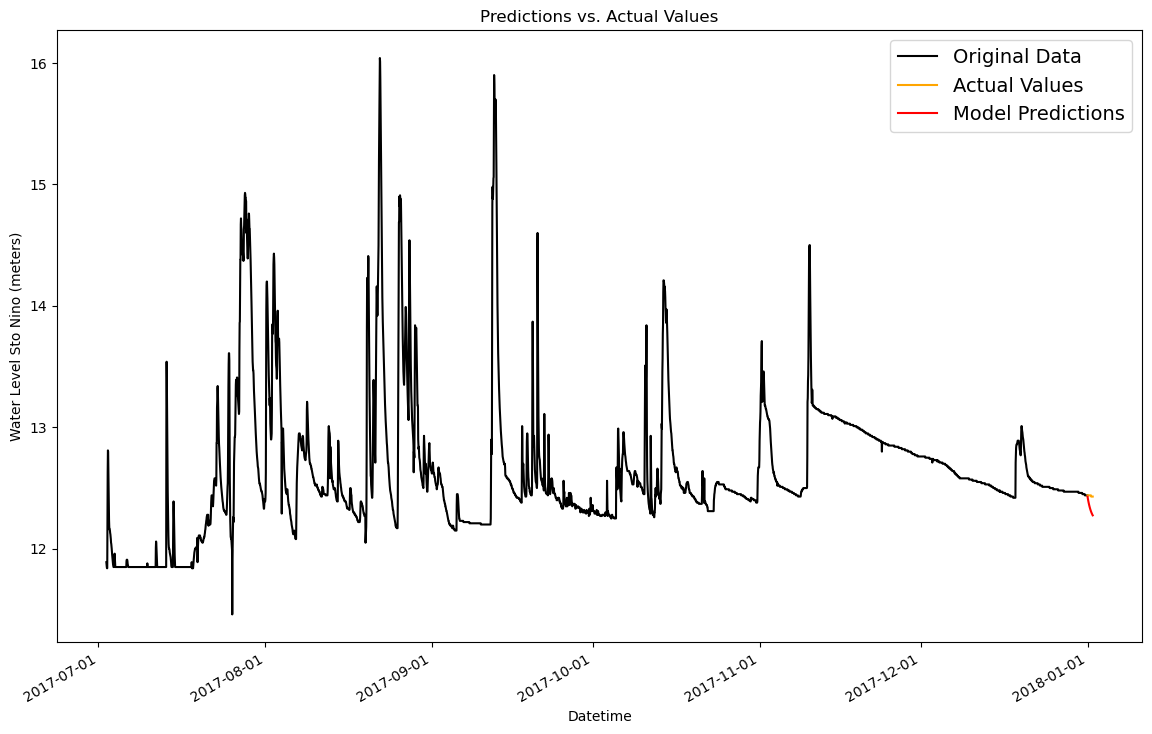

In [27]:
plt.figure(figsize=(14,9))
plt.plot(test_dates, sto_nino_true, c='black', label='Original Data')
plt.plot(add_dates, add_true, c='orange', label='Actual Values')
plt.plot(add_dates, add_pred, c='red', label='Model Predictions')
plt.title('Predictions vs. Actual Values')
plt.ylabel('Water Level Sto Nino (meters)')
plt.xlabel('Datetime')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.gcf().autofmt_xdate()
plt.gca().xaxis_date()
plt.legend(prop={'size': 14})
plt.show()

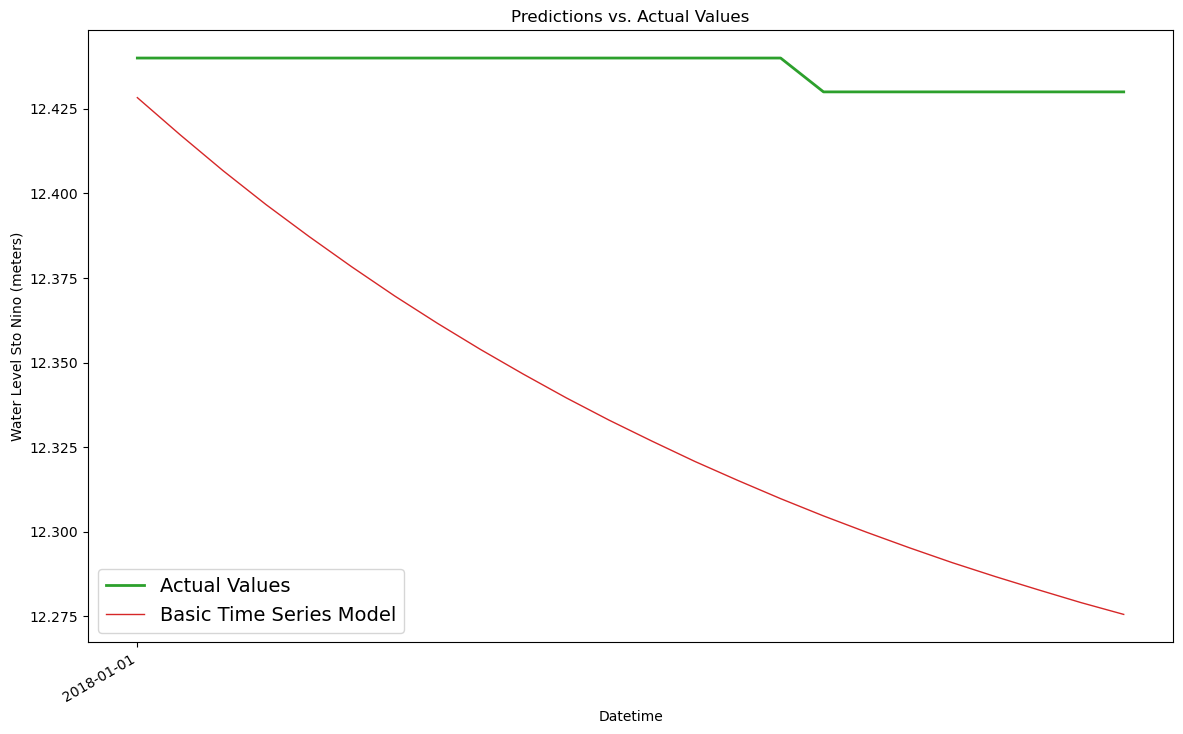

In [24]:
plt.figure(figsize=(14,9))
plt.plot(add_dates, add_true, c='tab:green', label='Actual Values', linewidth=2)
plt.plot(add_dates, add_pred, c='tab:red', label='Basic Time Series Model', linewidth=1)
plt.title('Predictions vs. Actual Values')
plt.ylabel('Water Level Sto Nino (meters)')
plt.xlabel('Datetime')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.gcf().autofmt_xdate()
plt.gca().xaxis_date()
plt.legend(prop={'size': 14})
plt.show()

### Univariate vs. Multivariate LSTM vs. Window 1, Sto Nino predictions

In [12]:
uni_lstm_pred = pd.read_csv('results/univariate_lstm_predictions.csv', header=None, names=['Waterlevel'])
uni_lstm_pred

,Waterlevel
0,12.1242
1,12.4815
2,12.7188
3,12.7825
4,12.7183
...,...
4369,12.4478
4370,12.4478
4371,12.4478
4372,12.4478


In [13]:
multi_lstm_pred = pd.read_csv('results/multivariate_lstm_predictions.csv', header=None, names=['Waterlevel'])
multi_lstm_pred

,Waterlevel
0,12.8262
1,12.5147
2,12.4972
3,12.4814
4,12.3783
...,...
4369,12.4038
4370,12.4038
4371,12.4038
4372,12.4038


In [14]:
window1_lstm_pred = pd.read_csv('results/window_lag1_sto_nino.csv', header=None, names=['Waterlevel'])
window1_lstm_pred

,Waterlevel
0,11.9897
1,11.9600
2,11.9264
3,11.8698
4,11.9328
...,...
4374,12.6201
4375,12.6187
4376,12.6267
4377,12.6324


In [15]:
uni_lstm_pred = pd.concat([pd.DataFrame([np.nan for i in range(5)], columns=['Waterlevel']), uni_lstm_pred], ignore_index=True)
uni_lstm_pred

,Waterlevel
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4374,12.4478
4375,12.4478
4376,12.4478
4377,12.4478


In [16]:
multi_lstm_pred = pd.concat([pd.DataFrame([np.nan for i in range(5)], columns=['Waterlevel']), multi_lstm_pred], ignore_index=True)
multi_lstm_pred

,Waterlevel
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4374,12.4038
4375,12.4038
4376,12.4038
4377,12.4038


In [17]:
dates_minus1 = test_dates[1:]
dates_minus1 = dates_minus1.reset_index(drop=True)
dates_minus1

0      2017-07-02 13:00:00
1      2017-07-02 14:00:00
2      2017-07-02 15:00:00
3      2017-07-02 16:00:00
4      2017-07-02 17:00:00
               ...        
4374   2017-12-31 19:00:00
4375   2017-12-31 20:00:00
4376   2017-12-31 21:00:00
4377   2017-12-31 22:00:00
4378   2017-12-31 23:00:00
Name: datetime, Length: 4379, dtype: datetime64[ns]

In [18]:
sto_nino_true_minus1 = sto_nino_true[1:]
sto_nino_true_minus1 = sto_nino_true_minus1.reset_index(drop=True)
sto_nino_true_minus1

0       11.87
1       11.85
2       11.84
3       11.84
4       12.26
        ...  
4374    12.44
4375    12.44
4376    12.44
4377    12.44
4378    12.44
Name: Waterlevel, Length: 4379, dtype: float64

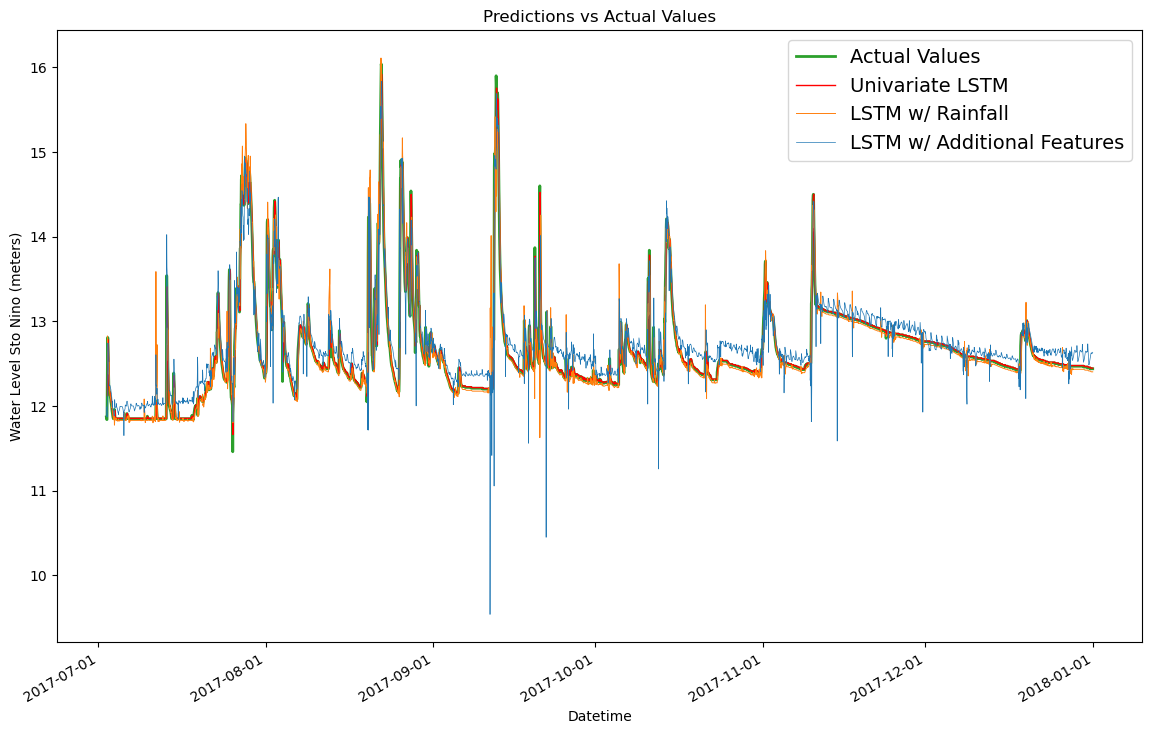

In [19]:
plt.figure(figsize=(14, 9))
plt.plot(dates_minus1, sto_nino_true_minus1, c = 'tab:green', label = "Actual Values", linewidth=2)
plt.plot(dates_minus1, uni_lstm_pred, c = 'red', label = "Univariate LSTM", linewidth=1)
plt.plot(dates_minus1, multi_lstm_pred, c = 'tab:orange', label = "LSTM w/ Rainfall", linewidth=0.7)
plt.plot(dates_minus1, window1_lstm_pred, label = "LSTM w/ Additional Features", linewidth=0.5)
plt.title('Predictions vs Actual Values')
plt.ylabel('Water Level Sto Nino (meters)')
plt.xlabel('Datetime')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.gcf().autofmt_xdate()
plt.gca().xaxis_date()
plt.legend(prop={'size': 14})
plt.show()

In [20]:
idx_sto_nino = sto_nino_true_minus1.idxmax()
zoomed_sto_nino_true = sto_nino_true_minus1[idx_sto_nino-12:idx_sto_nino+12]
zoomed_sto_nino_true

1208    13.97
1209    13.92
1210    13.99
1211    14.11
1212    14.24
1213    14.33
1214    14.50
1215    14.93
1216    15.20
1217    15.39
1218    15.64
1219    15.90
1220    16.04
1221    16.01
1222    15.87
1223    15.66
1224    15.46
1225    15.24
1226    15.00
1227    14.78
1228    14.57
1229    14.39
1230    14.21
1231    14.07
Name: Waterlevel, dtype: float64

In [21]:
zoomed_uni_lstm_pred = uni_lstm_pred[idx_sto_nino-12:idx_sto_nino+12]
zoomed_multi_lstm_pred = multi_lstm_pred[idx_sto_nino-12:idx_sto_nino+12]
zoomed_window1_lstm_pred = window1_lstm_pred[idx_sto_nino-12:idx_sto_nino+12]
zoomed_dates = dates_minus1[idx_sto_nino-12:idx_sto_nino+12]

In [22]:
dates_minus1.iloc[idx_sto_nino], sto_nino_true_minus1.iloc[idx_sto_nino], uni_lstm_pred.iloc[idx_sto_nino], multi_lstm_pred.iloc[idx_sto_nino], window1_lstm_pred.iloc[idx_sto_nino]

(Timestamp('2017-08-22 09:00:00'),
 16.04,
 Waterlevel    15.7558
 Name: 1220, dtype: float64,
 Waterlevel    15.995
 Name: 1220, dtype: float64,
 Waterlevel    15.7552
 Name: 1220, dtype: float64)

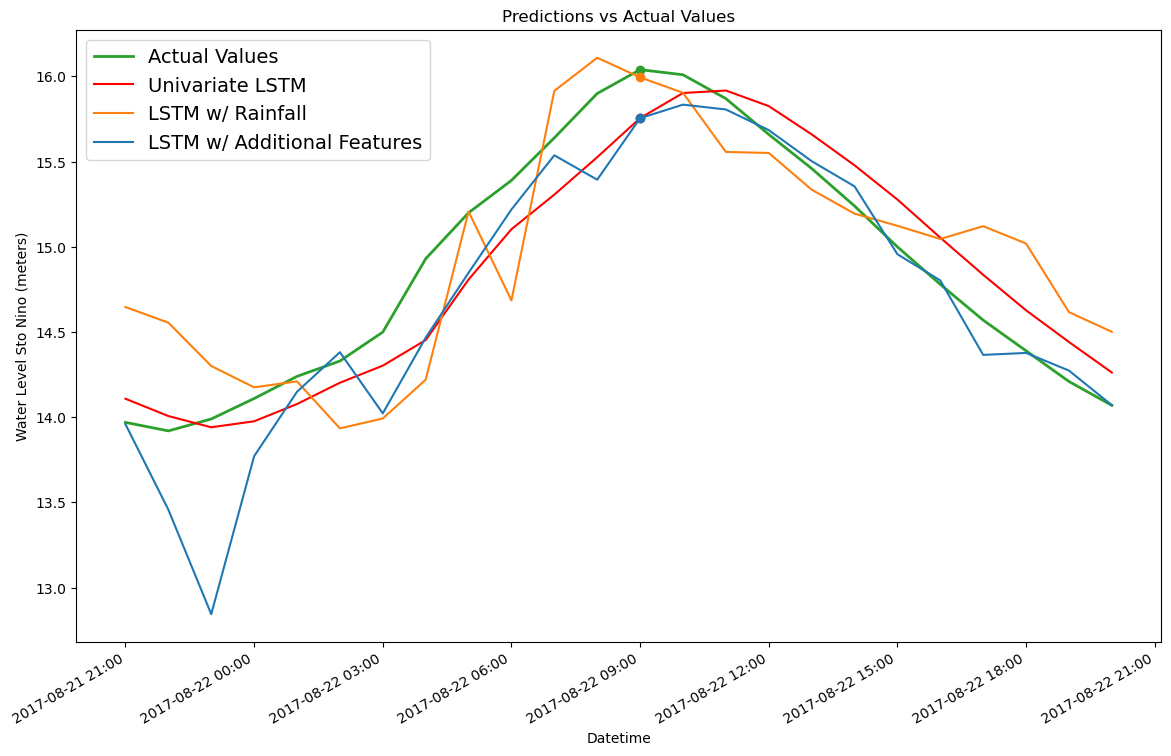

In [23]:
plt.figure(figsize=(14, 9))
plt.plot(zoomed_dates, zoomed_sto_nino_true, c = 'tab:green', label = "Actual Values", linewidth=2)
plt.plot(dates_minus1.iloc[idx_sto_nino], sto_nino_true_minus1.iloc[idx_sto_nino], 'o', c = 'tab:green')

plt.plot(zoomed_dates, zoomed_uni_lstm_pred, c = 'red', label = "Univariate LSTM")
plt.plot(dates_minus1.iloc[idx_sto_nino], uni_lstm_pred.iloc[idx_sto_nino], 'o', c = 'red')

plt.plot(zoomed_dates, zoomed_multi_lstm_pred, c = 'tab:orange', label = "LSTM w/ Rainfall")
plt.plot(dates_minus1.iloc[idx_sto_nino], multi_lstm_pred.iloc[idx_sto_nino], 'o', c = 'tab:orange')

plt.plot(zoomed_dates, zoomed_window1_lstm_pred, label = "LSTM w/ Additional Features")
plt.plot(dates_minus1.iloc[idx_sto_nino], window1_lstm_pred.iloc[idx_sto_nino], 'o', c = 'tab:blue')

plt.title('Predictions vs Actual Values')
plt.ylabel('Water Level Sto Nino (meters)')
plt.xlabel('Datetime')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gcf().autofmt_xdate()
plt.gca().xaxis_date()
plt.legend(prop={'size': 14})
plt.show()

In [24]:
sto_nino_df.iloc[idx_sto_nino+1]

datetime      2017-08-22 09:00:00
Station                  Sto_Nino
Waterlevel                  16.04
Name: 1221, dtype: object

### Lag 1 vs. Window 6, Montalban predictions

In [25]:
lag1_montalban_pred = pd.read_csv('results/no_window_lag1_montalban.csv', header=None, names=['Waterlevel'])
lag1_montalban_pred

,Waterlevel
0,21.1852
1,21.1718
2,21.1777
3,21.3101
4,20.8579
...,...
4375,21.1458
4376,21.1230
4377,21.0986
4378,21.0689


In [26]:
window6_montalban_pred = pd.read_csv('results/window_lag6_montalban.csv', header=None, names=['Waterlevel'])
window6_montalban_pred

,Waterlevel
0,21.4771
1,20.6538
2,20.7376
3,21.0371
4,21.0394
...,...
4369,21.3919
4370,21.3509
4371,21.2947
4372,21.2220


In [27]:
montalban_true

0       21.26
1       21.26
2       21.25
3       21.24
4       21.00
        ...  
4375    21.18
4376    21.18
4377    21.18
4378    21.18
4379    21.18
Name: Waterlevel, Length: 4380, dtype: float64

In [28]:
window6_montalban_pred = pd.concat([pd.DataFrame([np.nan for i in range(6)], columns=['Waterlevel']), window6_montalban_pred], ignore_index=True)
window6_montalban_pred

,Waterlevel
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4375,21.3919
4376,21.3509
4377,21.2947
4378,21.2220


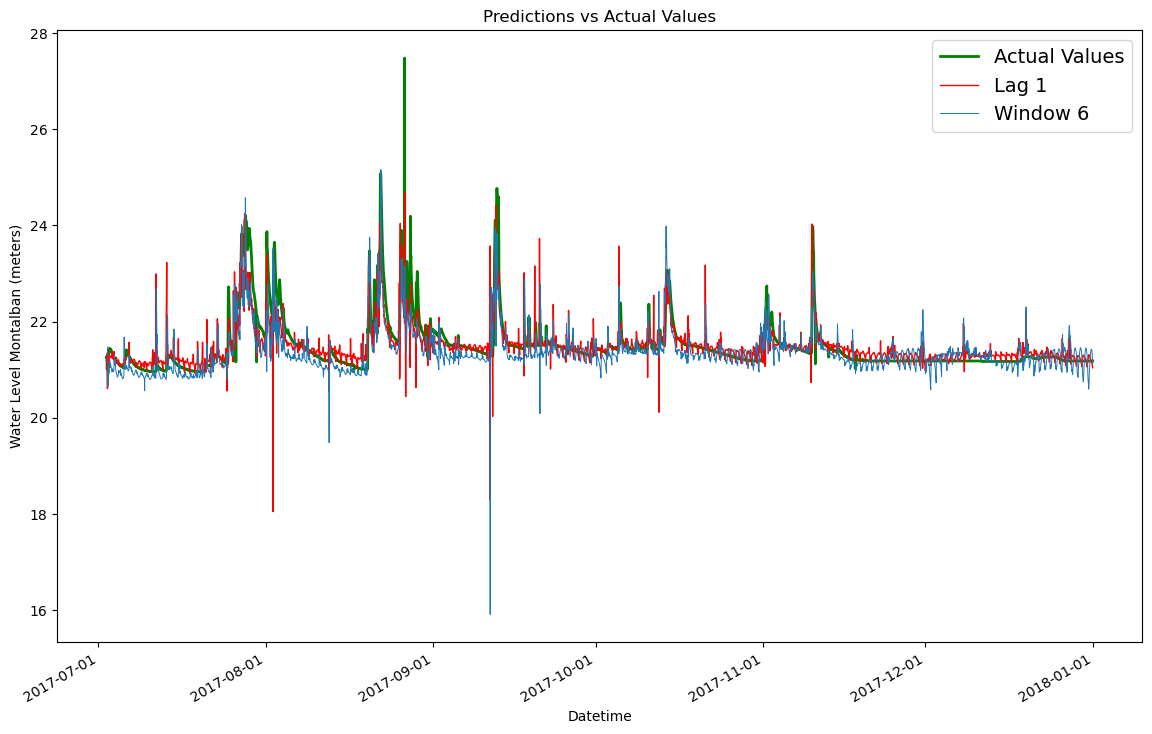

In [29]:
plt.figure(figsize=(14, 9))
plt.plot(test_dates, montalban_true, c = 'green', label = "Actual Values", linewidth=2)
plt.plot(test_dates, lag1_montalban_pred, c = 'red', label = "Lag 1", linewidth=1)
plt.plot(test_dates, window6_montalban_pred, label = "Window 6", linewidth=0.7)
plt.title('Predictions vs Actual Values')
plt.ylabel('Water Level Montalban (meters)')
plt.xlabel('Datetime')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.gcf().autofmt_xdate()
plt.gca().xaxis_date()
plt.legend(prop={'size': 14})
plt.show()

In [30]:
idx_montalban = montalban_true.idxmax()
zoomed_montalban_true = montalban_true[idx_montalban-12:idx_montalban+12]
zoomed_montalban_true

1312    23.60
1313    23.47
1314    23.40
1315    23.40
1316    23.27
1317    23.13
1318    23.00
1319    22.89
1320    22.79
1321    22.71
1322    22.63
1323    22.55
1324    27.48
1325    22.42
1326    22.38
1327    22.39
1328    22.52
1329    22.64
1330    22.65
1331    22.77
1332    22.96
1333    23.18
1334    23.25
1335    23.20
Name: Waterlevel, dtype: float64

In [31]:
idx_montalban = montalban_true[:idx_montalban].idxmax()

In [32]:
zoomed_montalban_true = montalban_true[idx_montalban-12:idx_montalban+12]
zoomed_montalban_true

1206    23.17
1207    22.97
1208    22.84
1209    23.01
1210    23.20
1211    23.40
1212    23.44
1213    23.43
1214    23.53
1215    23.63
1216    24.64
1217    24.99
1218    25.08
1219    24.96
1220    24.72
1221    24.51
1222    24.29
1223    24.06
1224    23.87
1225    23.69
1226    23.52
1227    23.39
1228    23.27
1229    23.16
Name: Waterlevel, dtype: float64

In [33]:
zoomed_lag1_montalban_pred = lag1_montalban_pred[idx_montalban-12:idx_montalban+12]
zoomed_window6_montalban_pred = window6_montalban_pred[idx_montalban-12:idx_montalban+12]
zoomed_dates = test_dates[idx_montalban-12:idx_montalban+12]

In [34]:
test_dates.iloc[idx_montalban], montalban_true.iloc[idx_montalban], lag1_montalban_pred.iloc[idx_montalban], window6_montalban_pred.iloc[idx_montalban]

(Timestamp('2017-08-22 06:00:00'),
 25.08,
 Waterlevel    24.4223
 Name: 1218, dtype: float64,
 Waterlevel    24.5112
 Name: 1218, dtype: float64)

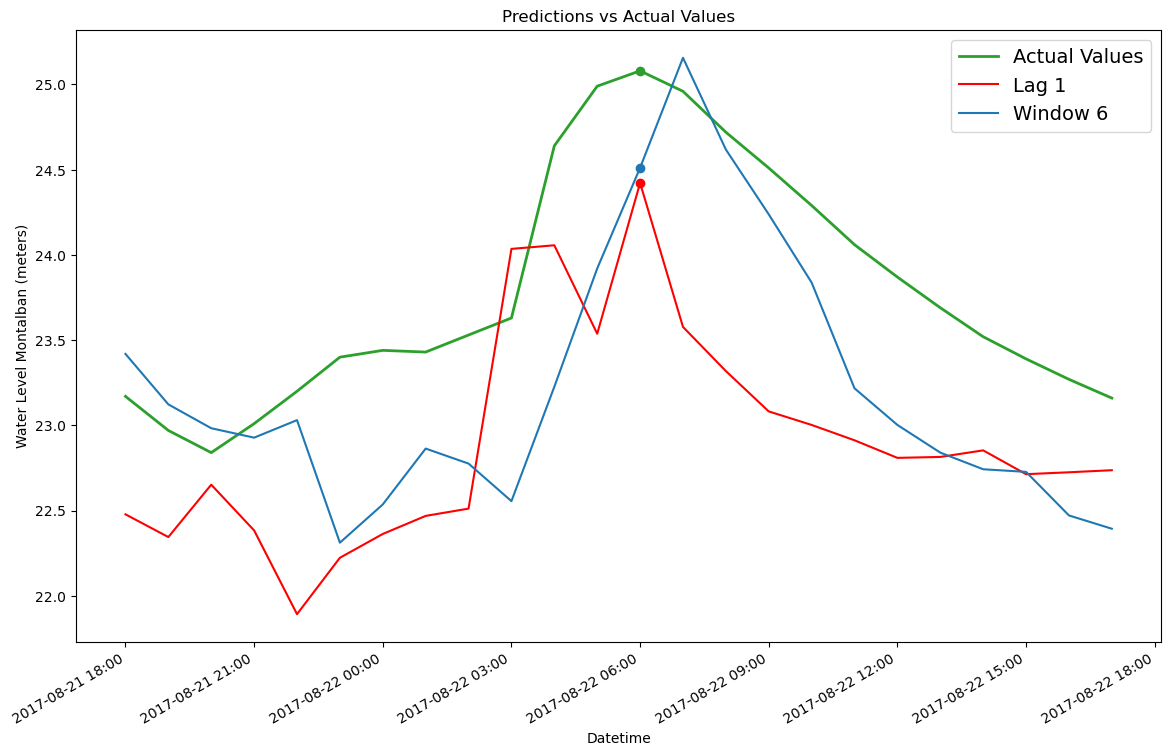

In [35]:
plt.figure(figsize=(14, 9))
plt.plot(zoomed_dates, zoomed_montalban_true, c = 'tab:green', label = "Actual Values", linewidth=2)
plt.plot(test_dates.iloc[idx_montalban], montalban_true.iloc[idx_montalban], 'o', c = 'tab:green')

plt.plot(zoomed_dates, zoomed_lag1_montalban_pred, c = 'red', label = "Lag 1")
plt.plot(test_dates.iloc[idx_montalban], lag1_montalban_pred.iloc[idx_montalban], 'o', c = 'red')

plt.plot(zoomed_dates, zoomed_window6_montalban_pred, label = "Window 6")
plt.plot(test_dates.iloc[idx_montalban], window6_montalban_pred.iloc[idx_montalban], 'o', c = 'tab:blue')

plt.title('Predictions vs Actual Values')
plt.ylabel('Water Level Montalban (meters)')
plt.xlabel('Datetime')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gcf().autofmt_xdate()
plt.gca().xaxis_date()
plt.legend(prop={'size': 14})
plt.show()

In [36]:
montalban_df.iloc[idx_montalban]

datetime      2017-08-22 06:00:00
Station                 Montalban
Waterlevel                  25.08
Name: 1218, dtype: object

In [37]:
window6_montalban_pred.iloc[idx_montalban+1]

Waterlevel    25.1566
Name: 1219, dtype: float64